In [2]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.style.use('ggplot')

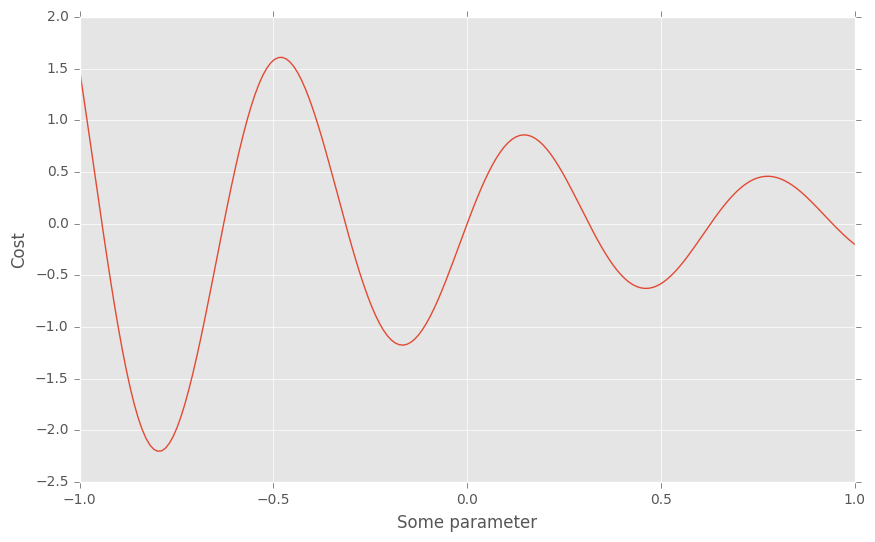

In [3]:
# some cost functions can have local minima

fig = plt.figure(figsize=(10,6))
ax = fig.gca()  #get current axis
x = np.linspace(-1,1,200)
hz = 10
cost = np.sin(hz * x) * np.exp(-x)
ax.set_xlabel('Some parameter')
ax.set_ylabel('Cost')
plt.plot(x, cost)
plt.show()

(199,)
(199,)


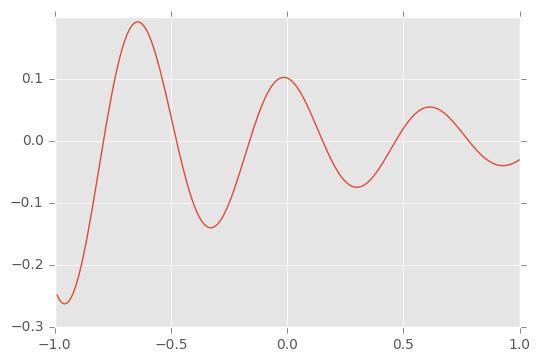

In [4]:
# gradient of cost function at each value of parameter p
gradient = np.diff(cost)

print(x[1:200].shape)
print(gradient.shape)

plt.plot(x[1:200], gradient)

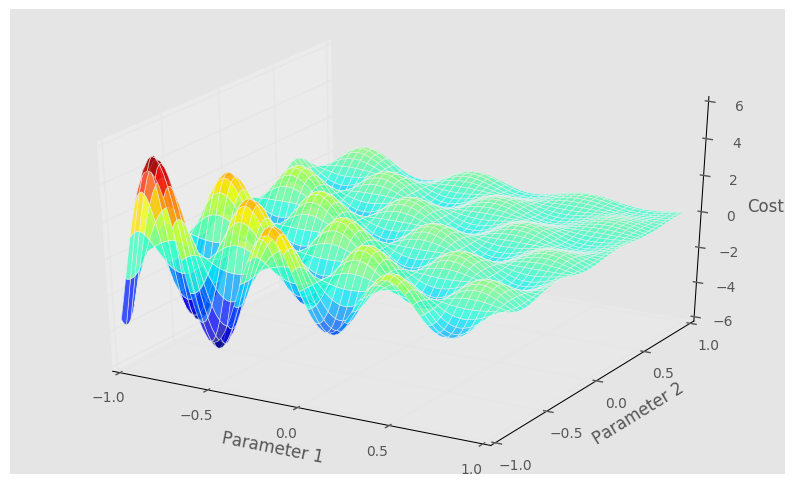

In [5]:
# cost gradient for 2 parameters

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X,Y,Z,rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Cost')


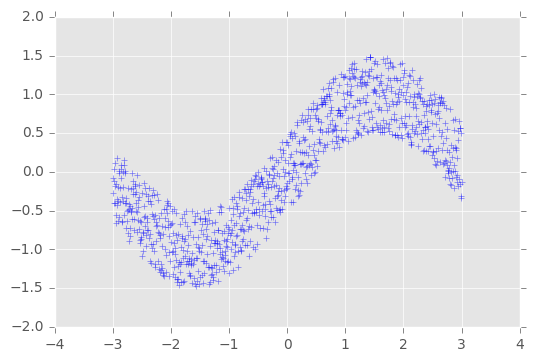

In [6]:
# create a neural network

# create some data
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.5, marker='+')

(array([   7.,   30.,   81.,  176.,  233.,  216.,  153.,   69.,   30.,    5.]),
 array([-3.0103786 , -2.40064702, -1.79091544, -1.18118386, -0.57145228,
         0.03827929,  0.64801087,  1.25774245,  1.86747403,  2.47720561,
         3.08693719]),
 <a list of 10 Patch objects>)

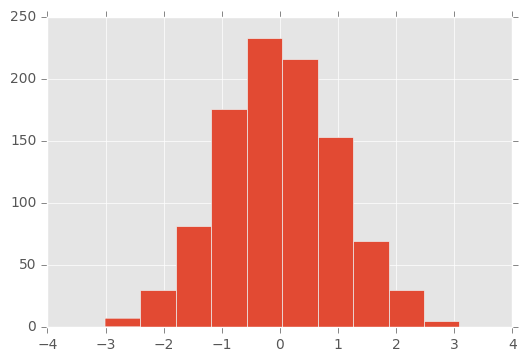

In [7]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

(array([   4.,   13.,   44.,  101.,  188.,  226.,  234.,  124.,   44.,   22.]),
 array([-0.33914864, -0.27782045, -0.21649227, -0.15516408, -0.09383589,
        -0.0325077 ,  0.02882048,  0.09014867,  0.15147686,  0.21280505,
         0.27413324]),
 <a list of 10 Patch objects>)

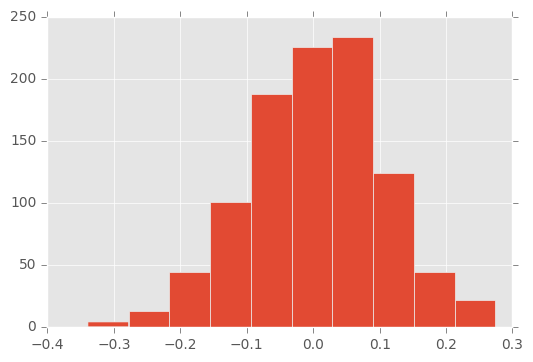

In [8]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [9]:
# define model parameters

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='Weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='Bias')

y_pred = X * W + B

In [10]:
cost = tf.reduce_mean(tf.abs(y_pred - Y))

In [11]:
# training parameters

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.771209
0.592473
0.49367
0.446797
0.428166
0.418875
0.415058
0.413447
0.412818
0.412589
0.412542
0.412514


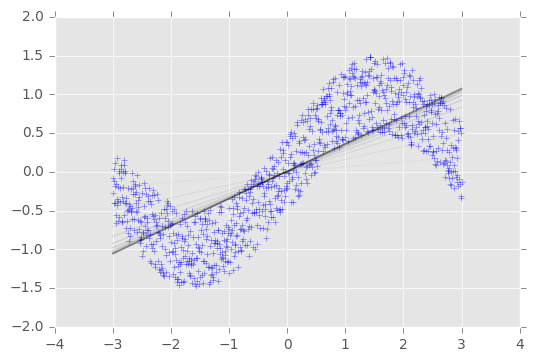

In [12]:
# iteration

n_iterations = 500
fig, ax = plt.subplots(1,1)
plt.scatter(xs, ys, alpha=0.5, marker='+')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y:ys})
        
        if it_i%10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            fig.show()
            #fig.draw()
            
            print(training_cost)
        
        # if we optimized model params enough, stop iteration
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost

In [13]:
# mini batch generation

idxs = np.arange(100)
batch_size = 10
n_batches = int(len(idxs) / batch_size)

for i in range(n_batches):
    print(idxs[i * batch_size : (i+1)*batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [14]:
# we need to randomize batch content
# to avoid the nn overfit the order of inputs

rand_idxs = np.random.permutation(idxs)

for i in range(n_batches):
    print(rand_idxs[i*batch_size : (i+1)*batch_size])

[23 36 14 29 41  5  6 32 17  3]
[46 65 73 15 94 86 38 45 66 10]
[98 52 82 16 25 44 89 90 88 31]
[62 95 11 35 12 70 37 81 61 87]
[78 33 55 75 60 42 34  9 39 47]
[96 24 13 59 99 84 92  1 54 97]
[72 56 93  2 43  7 21 79  8 22]
[85 53 80 48 28 57 51  4 19 77]
[18  0 83 67 71 40 26 63 76 20]
[68 91 27 69 30 50 64 49 58 74]


0.538184
0.455495
0.418076
0.40565
0.409958
0.449545
0.387879
0.397846
0.452903
0.428682
0.356357
0.368921
0.388904
0.40886
0.393952
0.452646
0.435224
0.421561
0.452994
0.438963
0.412442
0.378343
0.361212
0.401967
0.430636
0.42724
0.399618
0.463904
0.372169
0.440586
0.402425
0.467271
0.390267
0.446216
0.418263
0.423351
0.40818
0.444141
0.427673
0.392103
0.444843
0.416533
0.443561
0.402979
0.449237
0.422643
0.441813
0.362194
0.359109
0.452927


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


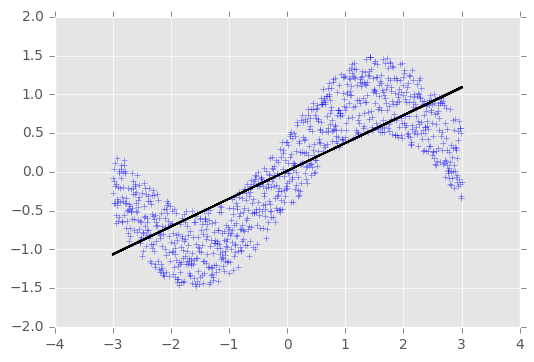

In [15]:
# train nn 

batch_size = 100
fig, ax = plt.subplots(1,1)
ax.scatter(xs, ys, alpha=0.5, marker='+')
ax.set_xlim([-4,4])
ax.set_ylim([-2,2])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            
        training_cost = sess.run(cost, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        
        if it_i % 10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            print(training_cost)

fig.show()

In [16]:
def train(X, Y, y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(tf.abs(y_pred - Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs, ys, alpha=0.5, marker='+')
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

1.77795
3.07776
2.88514
3.29096
2.90584
3.12025
3.13677
2.86795
2.39303
2.28106


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


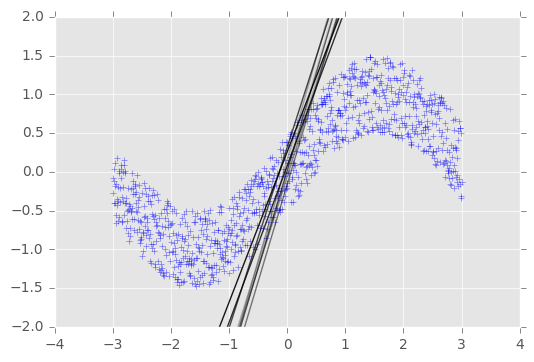

In [17]:
# create the network

n_neurons = 100

W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

y_pred = tf.reduce_sum(h, reduction_indices=1)

train(X, Y, y_pred)

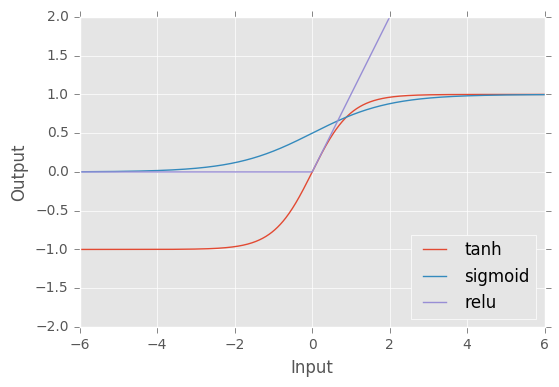

In [18]:
# non-linearities, activation function

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6,6])
plt.ylim([-2,2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

In [19]:
# create a single layer

def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0.0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b)
    return h

In [20]:
# explore the graph

from tensorflow.python.framework import ops
ops.reset_default_graph()

# get the current graph
g = tf.get_default_graph()

# list the oprerations in the graph
[op.name for op in g.get_operations()]

# create a network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

[op.name for op in g.get_operations()]


['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh']

In [21]:
# the names in the graph are not helpful
# we cant distinguish operations in different layers
# we can use scopes to group them

def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
           name='W',
           shape=[n_input, n_output],
           initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X,W)+b
        if activation is not None:
            h = activation(h)
        return h

In [22]:
# check the generated graph again

# first clear the graph
from tensorflow.python.framework import ops

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh',
 'X_1',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [22]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh',
 'X_1',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'la

# Painting Neural Network

In [23]:
# Image painting neural network

from scipy.misc import imresize

160


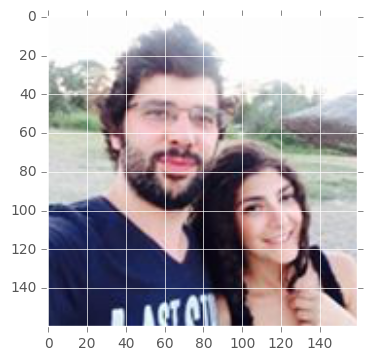

In [24]:
img = plt.imread('ee.jpg')
print(img.shape[0])
plt.imshow(img)

In [25]:
# imput : pixel coordinates
xs = []

# target : pixel color value
ys = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        xs.append([row, col])
        ys.append(img[row, col])
        
#convert lists to array
xs = np.array(xs)
ys = np.array(ys)

# normalize input by mean and std dev
xs = (xs - np.mean(xs))/np.std(xs)
        
print(xs.shape, ys.shape)

(25600, 2) (25600, 3)


In [26]:
X = tf.placeholder(tf.float32, shape=[None, 2], name="X")
Y = tf.placeholder(tf.float32, shape=[None, 3], name="Y")

In [27]:
def create_layer(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [28]:
n_neurons = [2, 160, 160, 160, 160, 160, 160, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = create_layer(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [29]:
cost = tf.reduce_mean(tf.reduce_sum(tf.abs(Y_pred - Y), reduction_indices=1))

In [30]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 121.447


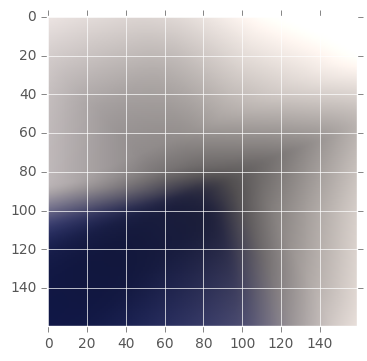

1 106.398
2 95.1145
3 86.2851
4 87.5897
5 81.5973
6 73.6068
7 65.337
8 63.0648
9 65.9784
10 61.2859
11 55.8387
12 56.0042
13 51.5229
14 54.7265
15 55.7917
16 47.5947
17 50.2578
18 49.2325
19 55.13
20 49.4805


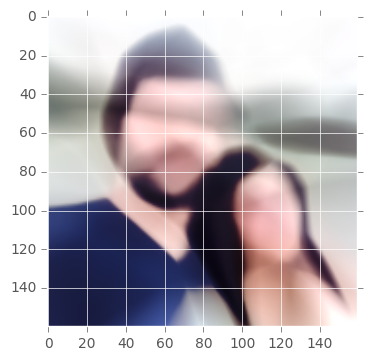

21 47.6828
22 47.2542
23 46.4426
24 43.5962
25 41.811
26 44.0885
27 44.4489
28 43.6303
29 43.486
30 41.7861
31 42.5683
32 42.9404
33 42.9725
34 44.3458
35 42.8455
36 41.7253
37 41.0512
38 40.7647
39 44.0324
40 43.8717


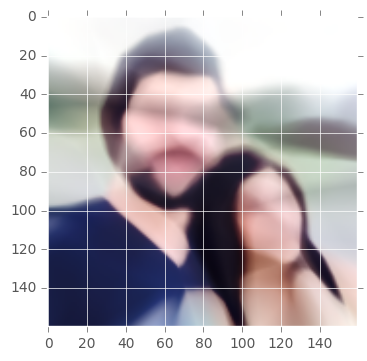

41 39.7407
42 39.3981
43 39.478
44 38.3748
45 45.0911
46 37.6334
47 42.797
48 39.4112
49 36.8626
50 39.4675
51 42.1867
52 37.6145
53 40.1071
54 38.3859
55 38.6057
56 38.3254
57 37.209
58 37.5301
59 37.4452
60 38.8166


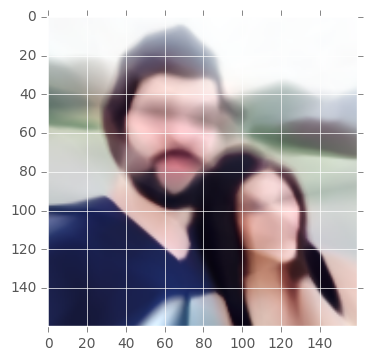

61 38.2126
62 34.9917
63 38.0414
64 40.8234
65 36.13
66 37.5954
67 38.5237
68 36.7452
69 37.5917
70 34.2131
71 34.6226
72 36.3179
73 32.8069
74 34.8259
75 33.5348
76 35.143
77 35.0367
78 33.2507
79 34.2422
80 32.9778


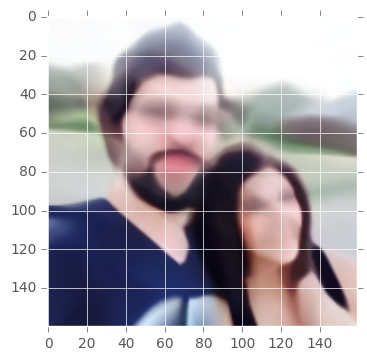

81 35.789
82 32.7965
83 32.8244
84 35.5894
85 32.5204
86 35.3741
87 32.7469
88 34.5324
89 32.1368
90 30.9346
91 31.2811
92 33.6171
93 31.4808
94 31.8076
95 30.6537
96 31.3759
97 33.1342
98 30.998
99 31.2309
100 30.1912


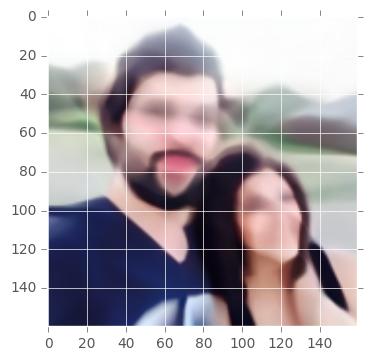

101 32.3909
102 32.2815
103 32.0755
104 30.3925
105 35.0234
106 30.7732
107 29.4249
108 31.7246
109 30.2621
110 30.4902
111 32.4079
112 31.5711
113 29.2034
114 31.9066
115 30.4591
116 30.0227
117 34.0992
118 31.1587
119 28.7186
120 29.6619


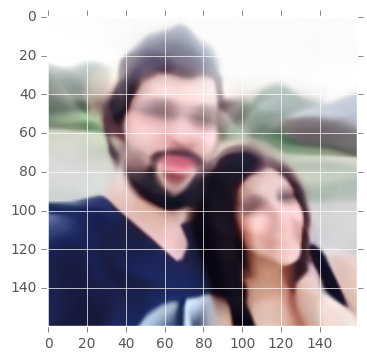

121 30.1802
122 29.6581
123 28.7098
124 30.7564
125 30.0523
126 30.99
127 31.5897
128 28.2726
129 29.4999
130 29.6357
131 28.1106
132 28.8268
133 30.2393
134 28.9095
135 28.7953
136 31.1602
137 28.0481
138 29.5567
139 29.0214
140 27.9383


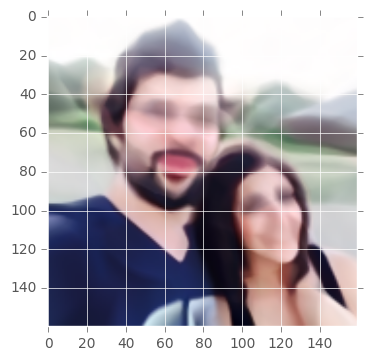

141 27.6166
142 28.1962
143 28.4744
144 29.1248
145 27.8323
146 26.5011
147 26.8958
148 26.625
149 27.6045
150 26.9421
151 27.8021
152 29.2351
153 27.4499
154 27.765
155 29.0867
156 28.0726
157 29.4928
158 26.53
159 28.9011
160 29.3895


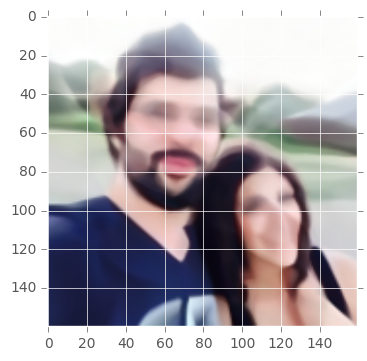

161 26.2904
162 27.8439
163 28.3181
164 27.0349
165 27.366
166 27.4068
167 26.2306
168 27.7952
169 25.8794
170 27.0658
171 28.5396
172 26.6824
173 27.2622
174 26.4729
175 26.1961
176 26.8157
177 26.7089
178 24.1788
179 28.9729
180 25.635


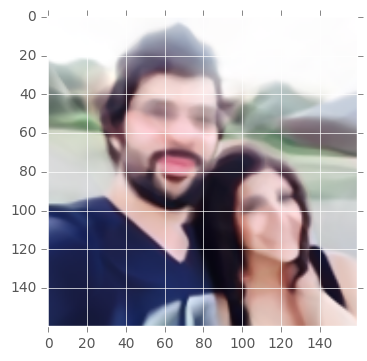

181 26.1349
182 25.403
183 29.2726
184 25.3608
185 28.2703
186 27.3608
187 29.2968
188 25.9977
189 27.4985
190 26.8762
191 25.2502
192 26.3427
193 25.5885
194 25.5194
195 24.5699
196 26.7859
197 26.3421
198 25.6725
199 24.8833
200 25.092


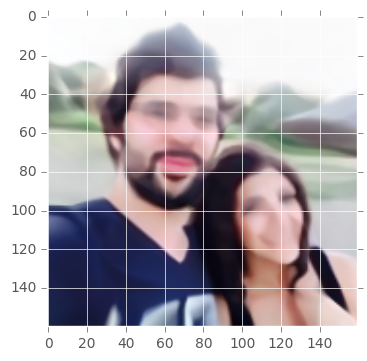

201 24.5941
202 25.2217
203 23.9071
204 24.2352
205 25.7548
206 25.6658
207 24.68
208 24.0886
209 25.2241
210 24.0721
211 26.9881
212 23.9341
213 24.3881
214 26.4398
215 26.6357
216 26.2015
217 24.5282
218 25.7377
219 25.0787
220 27.2418


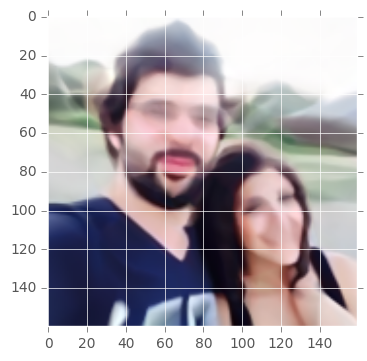

221 24.2924
222 23.2048
223 22.6845
224 25.8755
225 25.5315
226 23.0835
227 23.9398
228 22.7993
229 27.2326
230 23.6277
231 25.5584
232 23.9278
233 24.001
234 24.8402
235 23.412
236 24.8873
237 22.6058
238 22.9462
239 23.938
240 23.2969


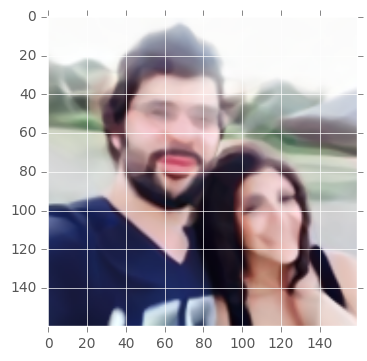

241 24.9724
242 23.9878
243 22.7141
244 23.2537
245 24.9417
246 23.8943
247 21.9976
248 25.0632
249 23.2527
250 25.1198
251 23.1441
252 26.0296
253 26.9449
254 22.9962
255 23.4917
256 23.1544
257 24.8064
258 22.0571
259 25.0567
260 24.0601


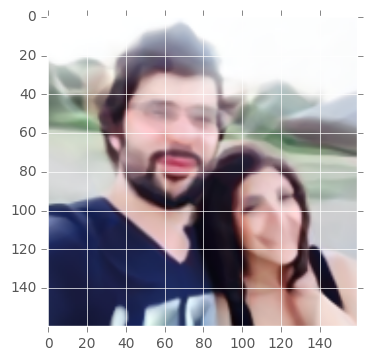

261 22.3928
262 22.001
263 22.8464
264 22.8614
265 22.5842
266 22.8961
267 22.1496
268 27.7939
269 22.9426
270 22.5242
271 21.6315
272 22.4274
273 22.0763
274 24.4652
275 22.692
276 23.6917
277 22.0199
278 24.5237
279 22.2742
280 22.0471


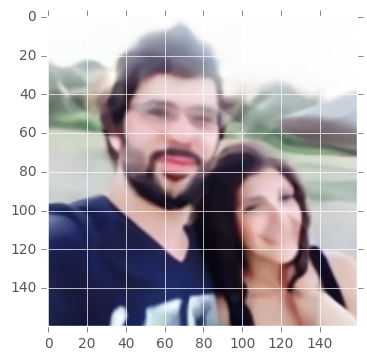

281 25.2928
282 23.5254
283 22.6996
284 21.5579
285 23.5193
286 21.5074
287 22.2547
288 21.8077
289 23.1093
290 22.9117
291 22.9181
292 21.1442
293 22.3583
294 22.8804
295 24.0946
296 22.0796
297 21.3945
298 22.7313
299 23.0721
300 22.3631


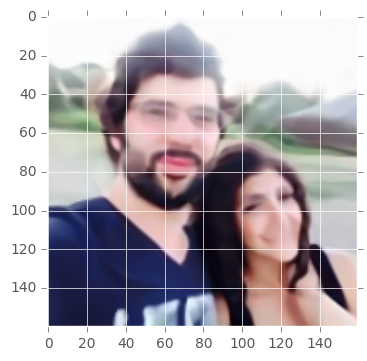

301 21.3327
302 20.3291
303 21.4438
304 23.0572
305 22.7686
306 20.8897
307 21.6372
308 20.5446
309 21.6643
310 25.4593
311 19.4853
312 21.5587
313 20.9818
314 21.5324
315 23.1987
316 20.5664
317 22.3422
318 21.5801
319 20.6895
320 20.4312


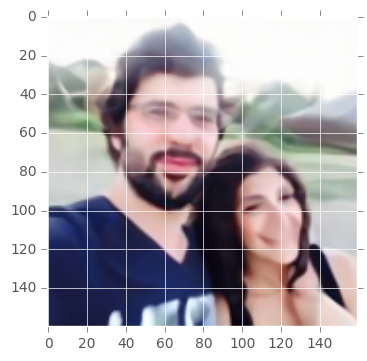

321 22.5612
322 23.1818
323 22.4331
324 22.5074
325 21.2266
326 21.004
327 20.7429
328 22.7172
329 22.8937
330 21.5965
331 21.3849
332 21.3996
333 22.0715
334 20.9382
335 21.5972
336 20.7045
337 22.629
338 22.827
339 20.9707
340 22.0109


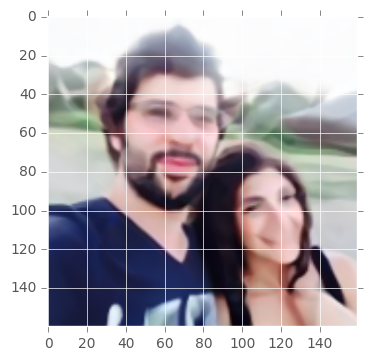

341 21.3716
342 21.1487
343 21.3401
344 21.277
345 23.0431
346 19.634
347 23.2544
348 20.7695
349 21.3367
350 20.6092
351 20.8515
352 21.3533
353 21.4522
354 19.5834
355 21.5072
356 19.6509
357 20.9381
358 21.1285
359 20.9711
360 20.2994


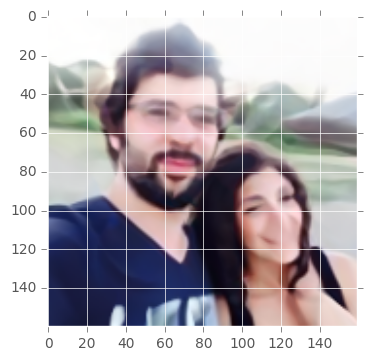

361 20.852
362 22.8523
363 20.4323
364 19.87
365 19.9505
366 21.5306
367 20.635
368 20.6403
369 22.3825
370 20.1008
371 21.2078
372 18.9296
373 20.8427
374 19.4611
375 20.5052
376 20.3278
377 20.331
378 20.2768
379 20.0473
380 21.6606


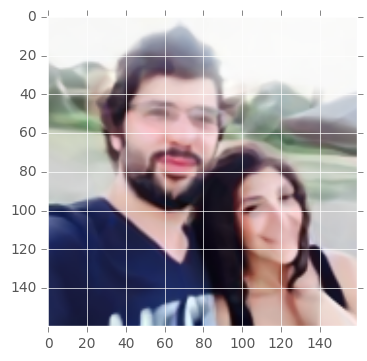

381 20.55
382 19.8749
383 20.4279
384 19.5865
385 19.9082
386 19.968
387 19.7139
388 20.8666
389 18.7662
390 19.0821
391 19.6217
392 21.6697
393 19.4981
394 21.5783
395 20.8394
396 21.2449
397 18.7323
398 20.469
399 20.5583
400 20.1223


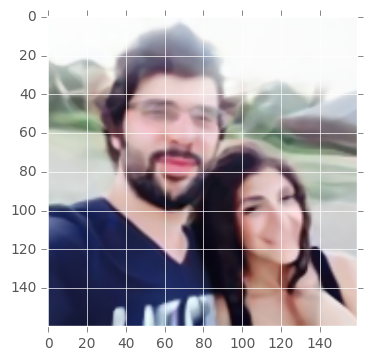

401 21.0513
402 20.508
403 20.2252
404 19.2438
405 21.0478
406 19.7478
407 19.1515
408 21.0784
409 20.5606
410 18.7597
411 18.3427
412 20.0684
413 21.7473
414 19.1636
415 19.905
416 19.4326
417 19.0719
418 20.4674
419 21.0101
420 19.1721


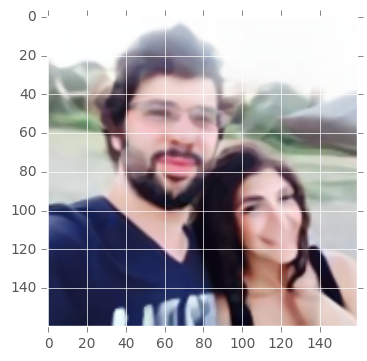

421 18.802
422 19.3326
423 19.8754
424 19.0092
425 20.9393
426 19.2175
427 19.0342
428 18.4852
429 17.7188
430 18.8038
431 18.8426
432 19.2736
433 18.8482
434 19.1081
435 18.7162
436 20.2764
437 18.7013
438 20.015
439 20.485
440 20.7897


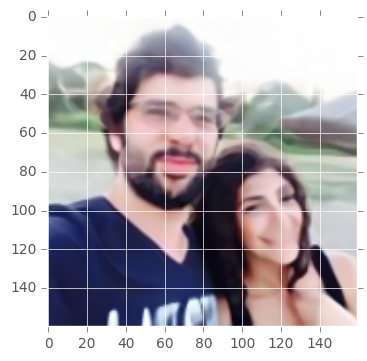

441 17.3669
442 18.3425
443 18.8788
444 18.7818
445 18.5744
446 19.9009
447 18.9947
448 20.5883
449 18.2532
450 19.0035
451 17.9596
452 17.5379
453 18.9498
454 18.5311
455 17.4335
456 19.4154
457 19.3346
458 19.1912
459 18.4792
460 19.7931


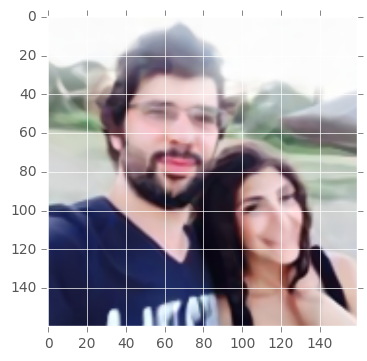

461 19.1236
462 19.4421
463 19.4919
464 19.7308
465 16.9914
466 17.474
467 19.0914
468 17.7046
469 20.8675
470 18.1869
471 18.9881
472 21.0486
473 18.813
474 19.5878
475 18.9365
476 19.1726
477 18.7003
478 19.1115
479 17.6641
480 18.6458


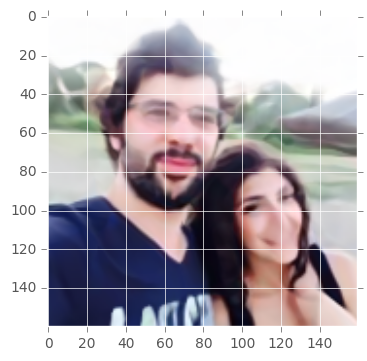

481 18.609
482 17.6482
483 18.7779
484 17.7058
485 17.7145
486 18.384
487 20.1718
488 17.4932
489 18.0068
490 17.7126
491 18.9531
492 19.5723
493 17.2546
494 17.5151
495 18.7084
496 19.6384
497 17.3948
498 17.6911
499 17.1484


In [33]:
# training

n_iterations = 500
batch_size = 50
imgs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)
        
        if it_i % 20 == 0:
            ys_pred = sess.run(Y_pred, feed_dict={X: xs})
            fig, ax = plt.subplots(1,1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            imgs.append(img)
            plt.imshow(img)
            plt.show()
            

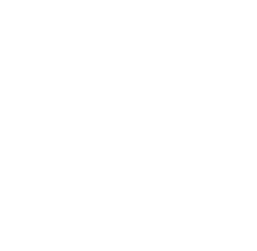

In [35]:
from libs import gif
import IPython.display as ipyd
    
# Save the images as a GIF
_ = gif.build_gif(imgs, saveto='single13.gif', show_gif=False)

ipyd.Image(url='single13.gif?{}'.format(np.random.rand()),
           height=500, width=500)

In [38]:
# create a exponentially increasing index list
# btw 0 - 499

for e in range(1, 90):
    i = 10**e/10.0
    print(i)

1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
1000000000000000.0
1e+16
1e+17
1e+18
1e+19
1e+20
1e+21
1e+22
1e+23
1.0000000000000001e+24
1e+25
1e+26
1e+27
1e+28
1.0000000000000001e+29
1e+30
1.0000000000000001e+31
9.999999999999999e+31
1e+33
1e+34
1e+35
9.999999999999999e+35
1e+37
1e+38
1.0000000000000001e+39
1e+40
1e+41
1e+42
1.0000000000000001e+43
9.999999999999999e+43
1e+45
1e+46
1e+47
9.999999999999999e+47
1.0000000000000001e+49
1e+50
1e+51
1e+52
1e+53
1e+54
1.0000000000000001e+55
1e+56
9.999999999999999e+56
1e+58
1e+59
1e+60
1.0000000000000001e+61
1e+62
1e+63
1e+64
1e+65
1e+66
1e+67
1.0000000000000001e+68
1e+69
1e+70
9.999999999999999e+70
1e+72
1e+73
1e+74
1.0000000000000001e+75
1e+76
1e+77
1e+78
1e+79
9.999999999999999e+79
1e+81
1e+82
1e+83
1e+84
1e+85
1e+86
1e+87
1e+88
